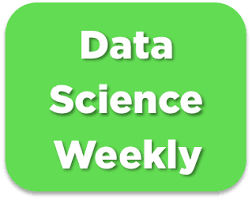

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should:
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨

In [325]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg"
from IPython.display import display

In [326]:
# Prevent display of UserWarning, FitFailedWarning and ConvergenceWarning for incompatible GridSearchCV parameters
import warnings
warnings.filterwarnings("ignore")

In [327]:
df_train = pd.read_csv("https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/conversion-rate-challenge-ft/conversion_data_train.csv")

# 1. EDA and Data Preprocessing

In [328]:
print(f"Number of rows : {(df_train.shape[0])} \n")
print(f"Number of columns : {(df_train.shape[1])} \n")
print()

print("Display of dataset: ")
display(df_train.head())
print()

print("Basics statistics: ")
data_desc = df_train.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
missing_perc = 100*df_train.isnull().sum()/len(df_train)
display(missing_perc)

Number of rows : 284580 

Number of columns : 6 


Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0



Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

## 1.1. Cleaning the data

There are no missing values, so we don't need to impute or drop data.

The variables "new_user" and "converted" (our target) are encoded.

There seems to be abnormal valus in the age column, let's check this out.

In [329]:
df_train["age"].value_counts()

28     12972
30     12956
29     12710
27     12668
26     12525
31     12327
25     12157
32     12111
24     11647
33     11392
23     11097
34     10911
22     10471
35     10352
21      9870
36      9668
20      9131
37      8773
19      8452
38      8067
18      7662
39      7343
17      6825
40      6451
41      5783
42      5029
43      4423
44      3808
45      3249
46      2693
47      2255
48      1898
49      1467
50      1213
51       990
52       835
53       571
54       459
55       352
56       251
57       211
58       147
59       115
60        86
61        63
62        50
63        29
64        26
65        14
66         9
67         5
68         2
70         2
111        1
72         1
69         1
73         1
79         1
123        1
77         1
Name: age, dtype: int64

In [330]:
df_train = df_train[df_train["age"] < 80]
df_train.shape

(284578, 6)

## 1.2. EDA

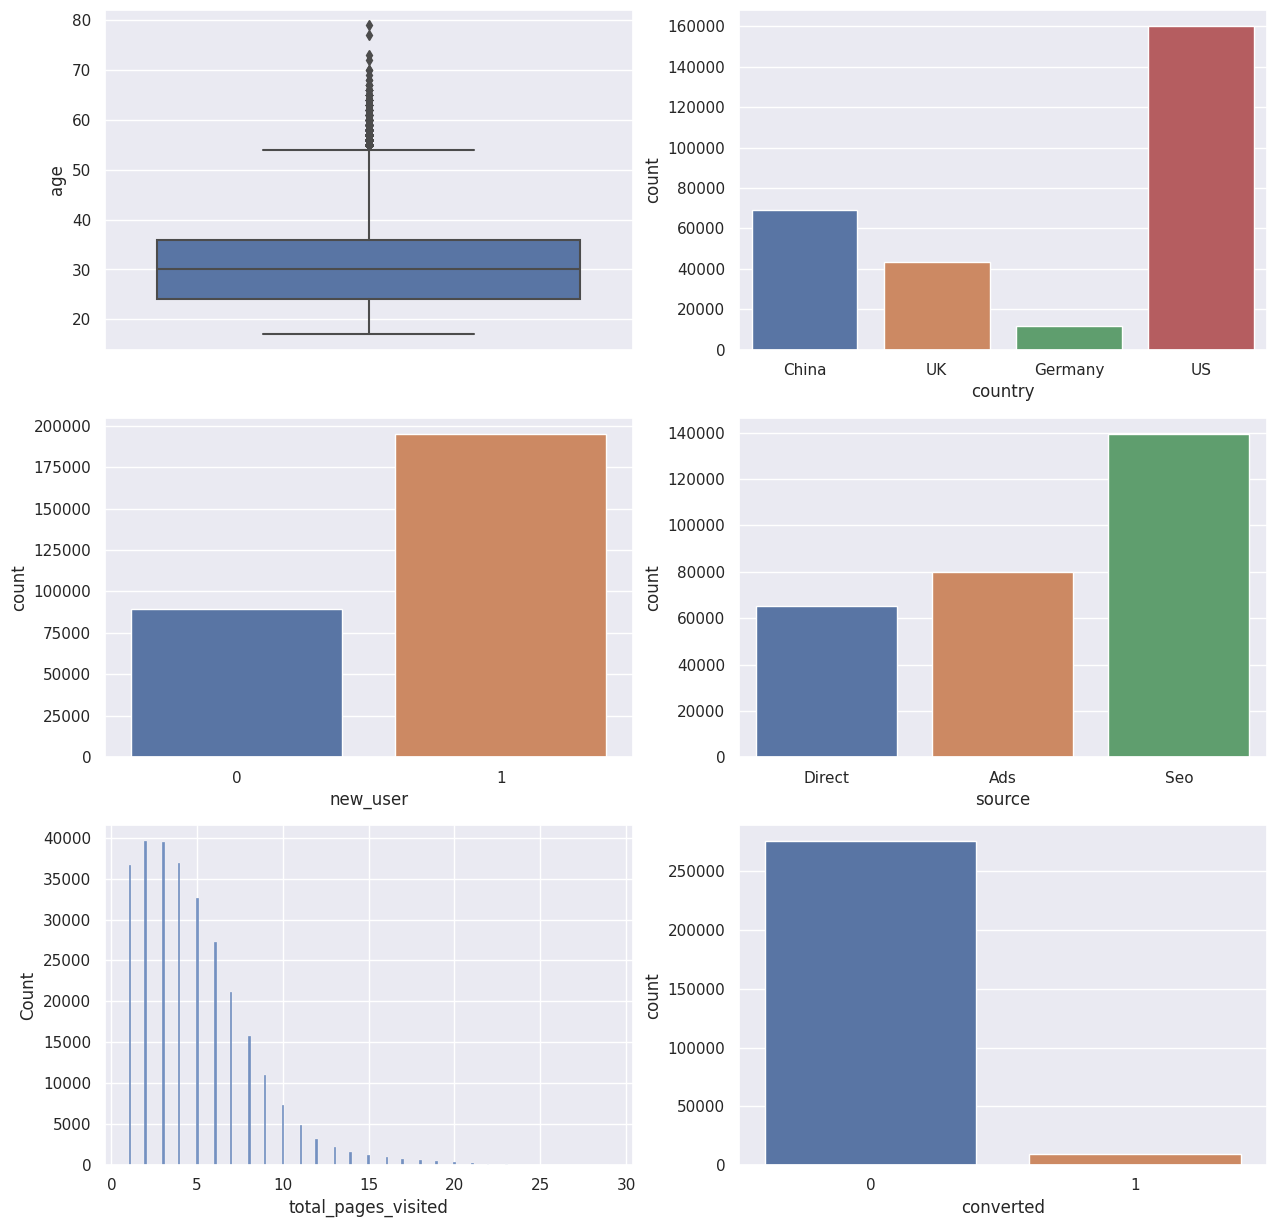

In [331]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(y=df_train["age"], ax=axs[0, 0])
sns.countplot(data=df_train, x="country", ax=axs[0, 1])
sns.countplot(data=df_train, x="new_user", ax=axs[1, 0])
sns.countplot(data=df_train, x="source", ax=axs[1, 1])
sns.histplot(data=df_train, x="total_pages_visited", ax=axs[2, 0])
sns.countplot(data=df_train, x="converted", ax=axs[2, 1])

plt.show()

We now have a better idea of our variables distribution.

Our "age" and "total_pages_visted" variables have a left-skewed normal distribution.

It is worth noting that "converted", our target, is extremely unbalanced.

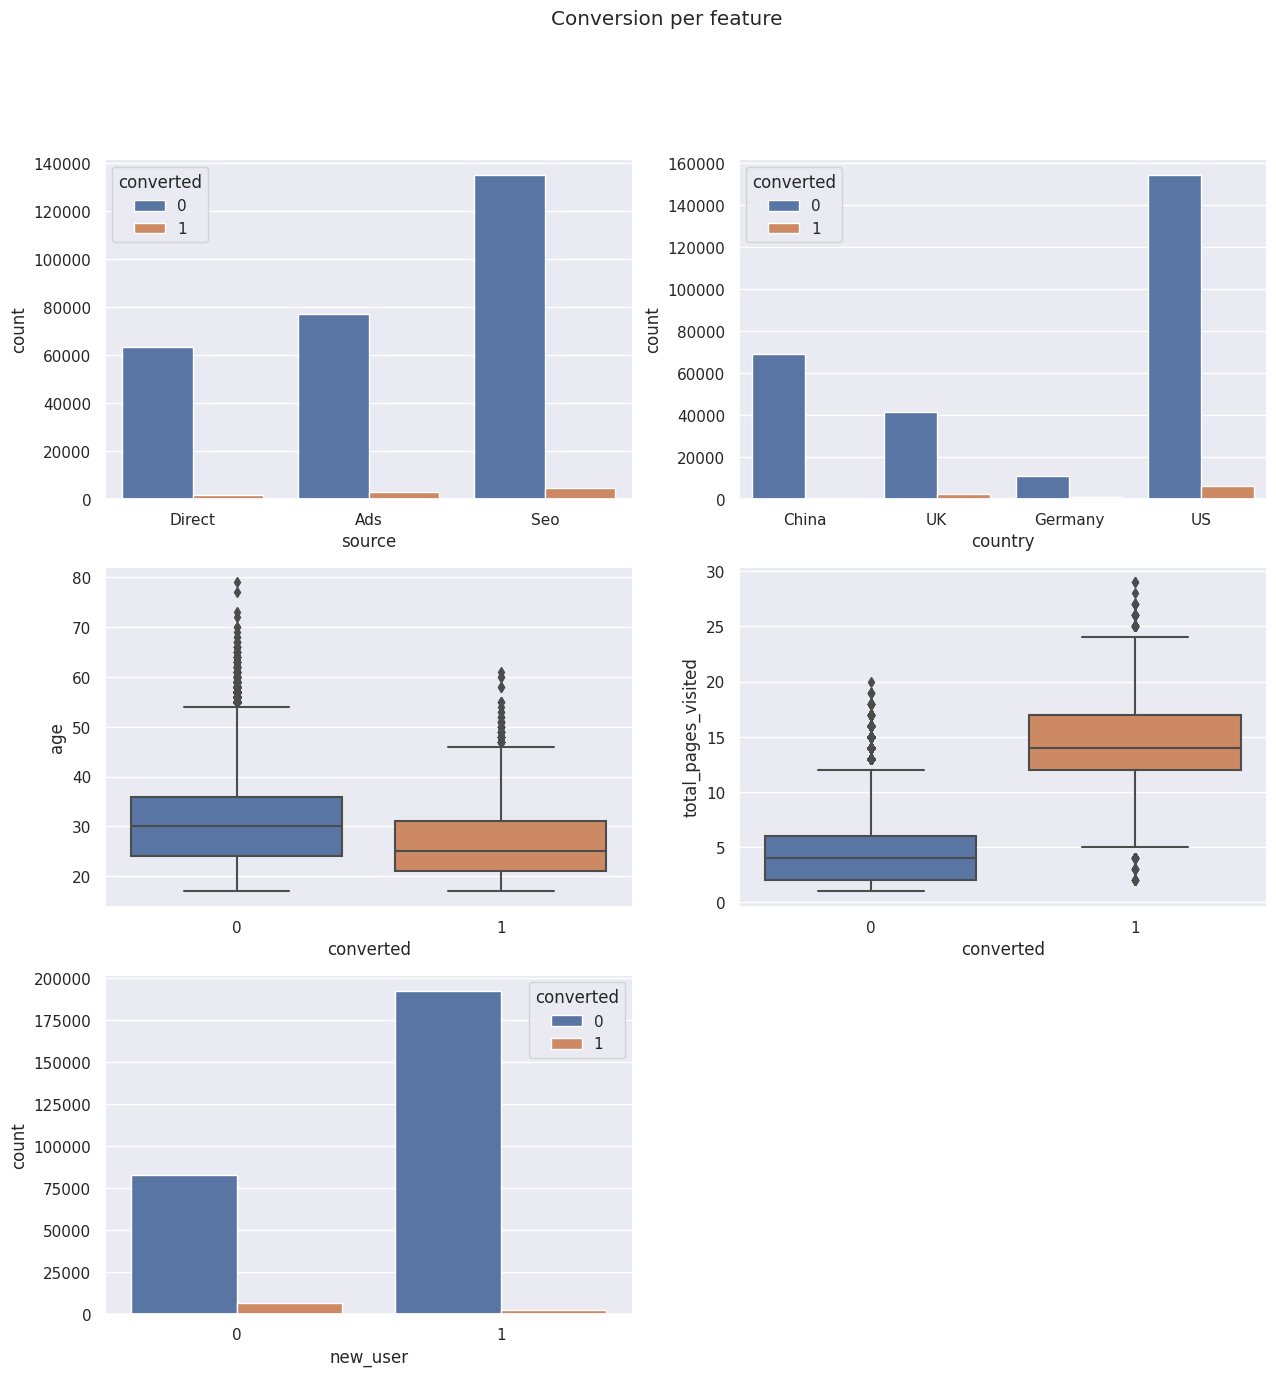

In [332]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(df_train, x='source', hue='converted', ax = axs[0, 0])
sns.countplot(df_train, x='country', hue='converted', ax=axs[0, 1])
sns.boxplot(df_train,x='converted', y='age', ax=axs[1, 0])
sns.boxplot(df_train,x='converted', y='total_pages_visited', ax=axs[1, 1])
sns.countplot(df_train, x='new_user', hue='converted', ax = axs[2, 0])
fig.delaxes(axs[2,1])

plt.suptitle('Conversion per feature')

plt.show()

At first sight, it seems the most influential features over conversion are the total number of pages visited and the user age. Interestingly, while many users are from China, their conversion rate is almost null.

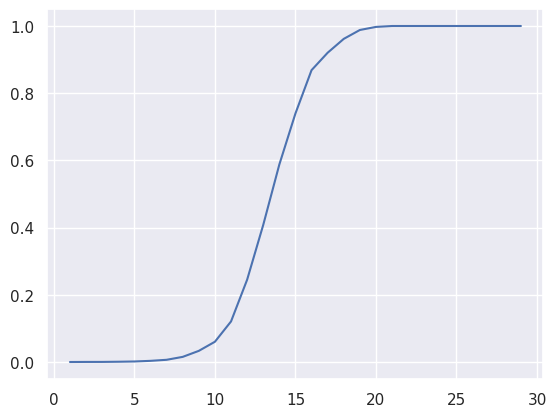

In [333]:
data_pages = df_train.groupby('total_pages_visited')[['converted']].mean()
plt.plot(data_pages.index, data_pages['converted'])


This plot shows that the more pages a user opens, the higher the probability of conversion.


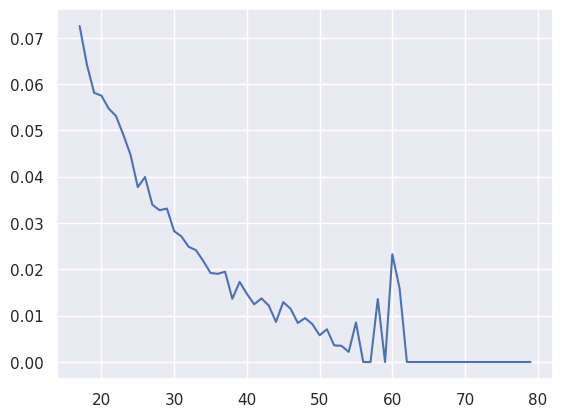

In [334]:
data_ages = df_train.groupby('age')[['converted']].mean()
plt.plot(data_ages.index,data_ages['converted'])

The probability of conversion decreases as the user's age increases.

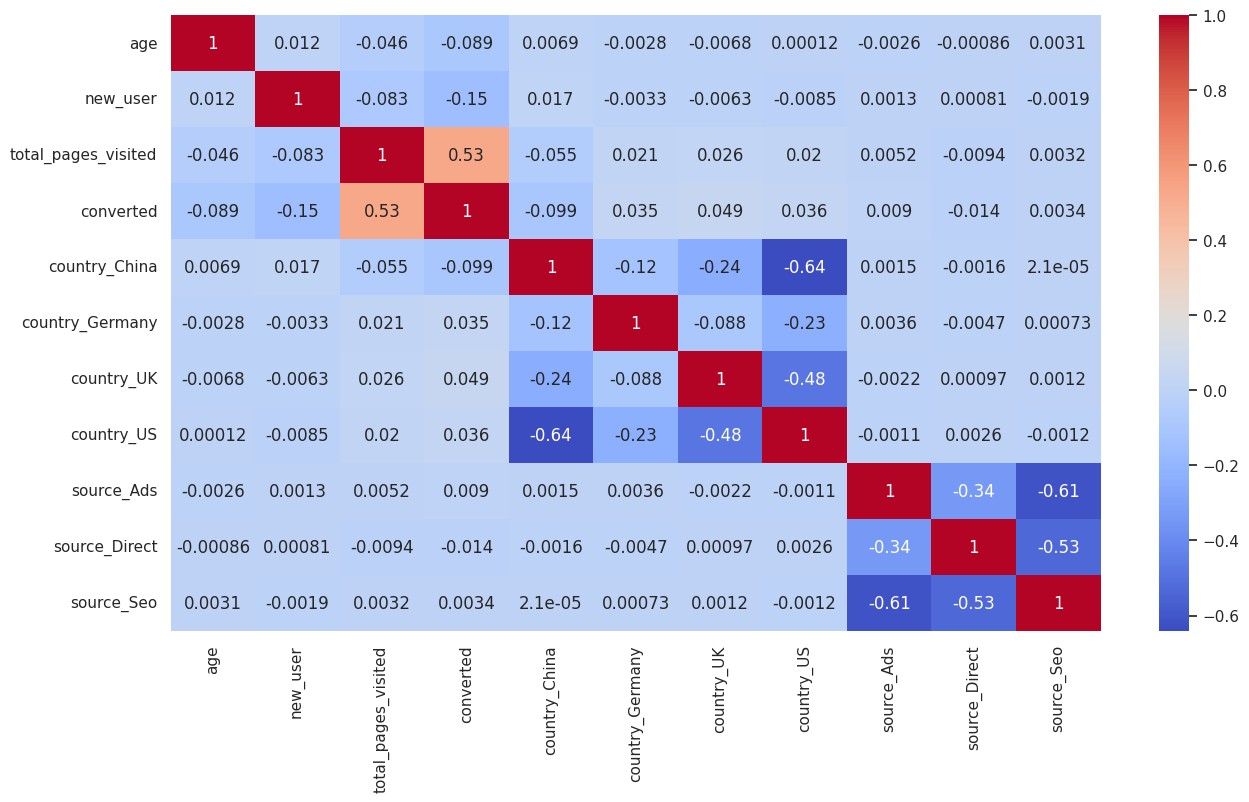

In [335]:
df_encoded = pd.get_dummies(df_train, columns=['country', 'source'])
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The feature most correlated to conversion is "total_pages_visited".

## 1.3. Data preprocessing

We'll begin by sampling our dataset to train our models : with more than 250000 rows, training for more complex models beyong binary logistic regression will take too long.

In [336]:
df_sample = df_train.sample(20000, random_state=42)

From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.

In [337]:
features_list = ['total_pages_visited']
target_variable = 'converted'

X = df_sample.loc[:, features_list]
Y = df_sample.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [338]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify = Y)
print("...Done.")
print()

print("Encoding categorical feature on train set...")
featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Dividing into train and test sets...
...Done.

Encoding categorical feature on train set...
...Done
[[-1.15309134]
 [ 1.53976566]
 [-1.15309134]
 [-0.25547234]
 [-0.85388501]]


# 2. Training a baseline model

In [339]:
# Creating empty dict to store models score
scores = {"Model" : [], "F1-score" : []}

In [340]:
print("Train model...")
baseline_logreg = LogisticRegression() #
baseline_logreg.fit(X_train, Y_train)
print("...Done.")

print("Predictions on training set...")
Y_train_pred = baseline_logreg.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [341]:
print("Encoding categorical feature on test set...")
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

print("Predictions on test set...")
Y_test_pred = baseline_logreg.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Encoding categorical feature on test set...
...Done
[[ 3.33500367]
 [-0.55467868]
 [-0.85388501]
 [ 0.04373399]
 [-0.85388501]]
Predictions on test set...
...Done.
[1 0 0 ... 0 0 0]



In [342]:
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6810176125244618
f1-score on test set :  0.717948717948718


Confusion matrix on train set : 


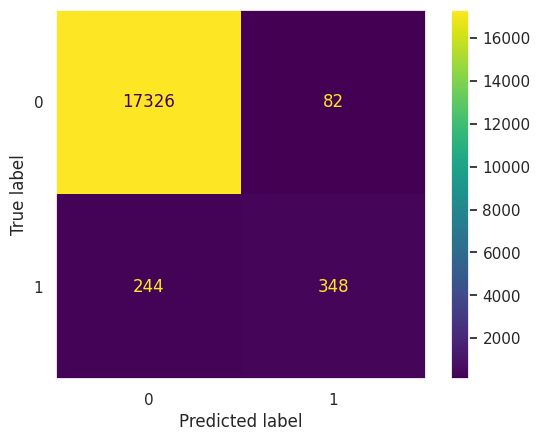

In [343]:
print("Confusion matrix on train set : ")
cm_train = confusion_matrix(Y_train, Y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=baseline_logreg.classes_)
disp_train.plot()
plt.grid(False)
plt.show()

Confusion matrix on test set : 


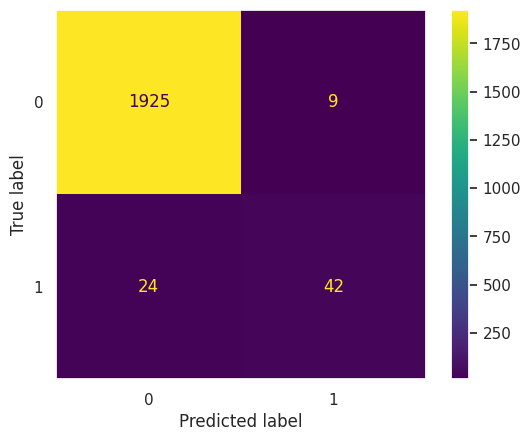

In [344]:
print("Confusion matrix on test set : ")
cm_test = confusion_matrix(Y_test, Y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=baseline_logreg.classes_)
disp_test.plot()
plt.grid(False)
plt.show()

In [345]:
scores["Model"].append("Baseline logistic regression")
scores["F1-score"].append(f1_score(Y_test, Y_test_pred))

# 3. Improving model's F1-score

## 3.1. Multivariate logistic regression

In [346]:
features_list = [c for c in df_train.columns if c != "converted"]
target_variable = "converted"

X = df_sample.loc[:,features_list]
Y = df_sample.loc[:,target_variable]

print(f'X :\n{X.head()} \n')
print(f'Y :\n{Y.head()}')

X :
       country  age  new_user  source  total_pages_visited
183416      US   43         1     Seo                    3
264730      US   37         1     Seo                   13
42827    China   40         1     Seo                    2
173170   China   24         0  Direct                    8
275694      UK   38         1  Direct                    5 

Y :
183416    0
264730    0
42827     0
173170    0
275694    0
Name: converted, dtype: int64


In [265]:
# Scrapped for considering 'new_user' a numeric feature

# numeric_features = []
# categorical_features = []

# for i,t in X.dtypes.items():
#     if ('float' in str(t)) or ('int' in str(t)) :
#         numeric_features.append(i)
#     else :
#         categorical_features.append(i)

# print('Numeric features: ', numeric_features)
# print('Categorical features: ', categorical_features)

In [348]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user', 'source']

print('Numeric features: ', numeric_features)
print('Categorical features: ', categorical_features)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

print("Performing preprocessings on the features...")
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print("...Done")

Numeric features:  ['age', 'total_pages_visited']
Categorical features:  ['country', 'new_user', 'source']
Performing preprocessings on the features...
...Done


In [267]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7753396029258097
f1-score on test set :  0.7868852459016394


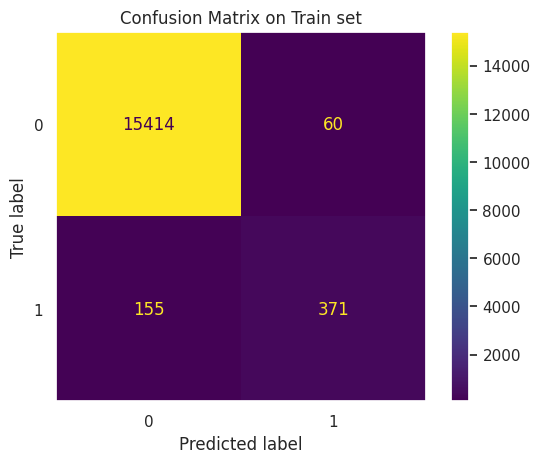

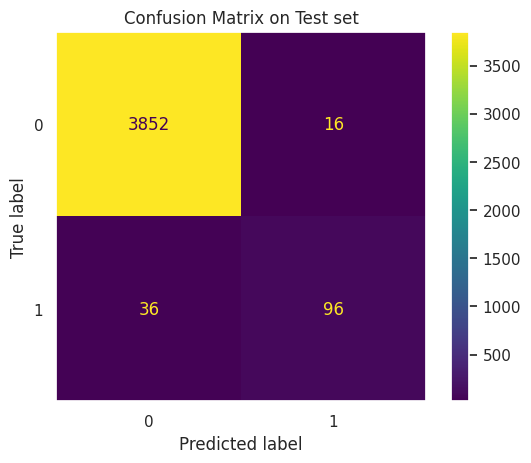

In [268]:
_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Train set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax)
plt.grid(False)
plt.show()

_ , ax = plt.subplots()
ax.set(title="Confusion Matrix on Test set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
plt.grid(False)
plt.show()

Taking into account all our features has definitely improved our model's F1-score!

In [269]:
scores["Model"].append("Multivariate logistic regression")
scores["F1-score"].append(f1_score(Y_test, Y_test_pred))

## 3.2. Optimizing logistic regression parameters using gridsearch

In [270]:
print("Grid search...")
logreg = LogisticRegression(max_iter=1000)
param_grid = {
    'penalty': ["l1", "l2", "elasticnet", None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

logreg_cv = GridSearchCV(logreg, param_grid, cv = 5, verbose = 1)

logreg_cv.fit(X_train, Y_train)
print("...Done.")

print("Best hyperparameters : ", logreg_cv.best_params_)
print("Best score : ", logreg_cv.best_score_)

logreg_best = logreg_cv.best_estimator_
logreg_best_Y_pred = logreg_best.predict(X_test)
logreg_best_f1 = f1_score(Y_test, logreg_best_Y_pred)
print("Best model's f1-score on test set", logreg_best_f1)

Grid search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
...Done.
Best hyperparameters :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score :  0.9868750000000001
Best model's f1-score on test set 0.7818930041152263


We're not improving our F1-score with parameters optimization for logistic regression.

Let's try out other models.

In [271]:
scores["Model"].append("Optimized logistic regression")
scores["F1-score"].append(logreg_best_f1)

## 3.3. Support Vector Machine

In [272]:
svc = SVC()

svc.fit(X_train, Y_train)

Y_train_pred_svc = svc.predict(X_train)

Y_test_pred_svc = svc.predict(X_test)

print("f1-score svc on train set : ", f1_score(Y_train, Y_train_pred_svc))
print("f1-score svc on test set : ", f1_score(Y_test, Y_test_pred_svc))

f1-score svc on train set :  0.7648970747562297
f1-score svc on test set :  0.759825327510917


In [273]:
print("Grid search...")
svc = SVC()

params = {
    'C': [0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

gridsearch = GridSearchCV(svc, param_grid = params, scoring="f1", cv = 5, verbose=1)
gridsearch.fit(X_train, Y_train)
print("...Done.")

svc_best = gridsearch.best_estimator_
Y_pred = svc_best.predict(X_test)
test_f1_score_svc = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best score: ", svc_cv.best_score_)
print("F1-score on the test set: ", test_f1_score_svc)

Grid search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
...Done.
Best hyperparameters :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.7749449849057983
F1-score on the test set:  0.7933884297520661


The optimized SVM model performs well, but only very slightly better than our optimized logistic regression model.

In [274]:
scores["Model"].append("Optimized SVM")
scores["F1-score"].append(test_f1_score_svc)

## 3.3. Decision tree

In [275]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

Y_train_pred_dt = dt.predict(X_train)
Y_test_pred_dt = dt.predict(X_test)

print("f1-score decision tree on train set : ", f1_score(Y_train, Y_train_pred_dt))
print("f1-score decision tree on test set : ", f1_score(Y_test, Y_test_pred_dt))

f1-score decision tree on train set :  0.9139344262295083
f1-score decision tree on test set :  0.671875


In [276]:
print("Grid search...")
dt = DecisionTreeClassifier()

params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}

gridsearch = GridSearchCV(dt, param_grid = params, scoring="f1", cv = 5, verbose=1)
gridsearch.fit(X_train, Y_train)

dt_best = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = dt_best.predict(X_test)
test_f1_score_dt = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ", test_f1_score_dt)

Grid search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters :  {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best F1-score:  0.7254388155436542
F1-score on the test set:  0.7459016393442623


In [277]:
scores["Model"].append("Optimized Decision Tree")
scores["F1-score"].append(test_f1_score_dt)

## 3.4. Random forest

In [278]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

Y_train_pred_rf = rf.predict(X_train)
Y_test_pred_rf = rf.predict(X_test)

print("f1-score rf on train set : ", f1_score(Y_train, Y_train_pred_rf))
print("f1-score rf on test set : ", f1_score(Y_test, Y_test_pred_rf))

f1-score rf on train set :  0.9161676646706587
f1-score rf on test set :  0.7083333333333334


In [279]:
print("Grid search...")
rf = RandomForestClassifier()

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

gridsearch = GridSearchCV(rf, param_grid = params, scoring="f1", cv = 5, verbose=1)
gridsearch.fit(X_train, Y_train)

rf_best = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = rf_best.predict(X_test)
test_f1_score_rf = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ", test_f1_score_rf)

Grid search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-score:  0.7536271940886394
F1-score on the test set:  0.7705627705627706


In [280]:
scores["Model"].append("Optimized Random Forest")
scores["F1-score"].append(test_f1_score_rf)

Our best performing models are logistic regression and SVM. We'll try to improve their respective F1 scores with ensemble learning methods.

## 3.5. Ensemble learning

### 3.5.1. Logistic regression estimator

#### 3.5.1.1. Boosting

In [360]:
logistic = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')
model = AdaBoostClassifier(estimator=logistic)

params = {
    'estimator__C': [0.01, 0.1, 1, 5, 10, 20, 100],
    'n_estimators': [5, 10, 20, 30]
}

gridsearch = GridSearchCV(model, param_grid = params, scoring="f1", cv = 5, verbose=1)
gridsearch.fit(X_train, Y_train)

adaboost_log = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = adaboost_log.predict(X_test)
test_f1_score_boostlog = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ",test_f1_score_boostlog)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best hyperparameters :  {'estimator__C': 20, 'n_estimators': 20}
Best F1-score:  0.7802988446570753
F1-score on the test set:  0.7936507936507938


In [282]:
scores["Model"].append("Boosted logistic regression")
scores["F1-score"].append(test_f1_score_boostlog)

#### 3.5.1.2. Bagging

In [359]:
logistic = LogisticRegression(max_iter = 1000, penalty = 'l1', solver = 'liblinear')
model = BaggingClassifier(estimator=logistic)

params = {
    'estimator__C': [0.01, 0.1, 1, 5, 10, 20, 100],
    'n_estimators': [5, 10, 20, 30]
}

gridsearch = GridSearchCV(model, param_grid = params, scoring="f1", cv = 5, verbose=1)
gridsearch.fit(X_train, Y_train)

bagging_log = gridsearch.best_estimator_
best_f1_score = gridsearch.best_score_

Y_pred = bagging_log.predict(X_test)
test_f1_score_baglog = f1_score(Y_test, Y_pred)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best F1-score: ", best_f1_score)
print("F1-score on the test set: ",test_f1_score_baglog)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best hyperparameters :  {'estimator__C': 5, 'n_estimators': 30}
Best F1-score:  0.7807584080648183
F1-score on the test set:  0.7818930041152263


In [284]:
scores["Model"].append("Bagged logistic regression")
scores["F1-score"].append(test_f1_score_baglog)

### 3.5.2. Voting

In [285]:
voting = VotingClassifier(
    estimators=[
        ("logistic", logreg_best),
         ("adaboost_log", adaboost_log),
          ("bagging_log", bagging_log),
           ("best_model_svc", svc_best)
           ],
    voting='hard') # soft: use probabilities for voting

voting.fit(X_train, Y_train)

Y_pred = voting.predict(X_test)
test_f1_score_vot = f1_score(Y_test, Y_pred)
print("F1-score on test set:", test_f1_score_vot)

F1-score on test set: 0.7818930041152263


Now let's see which model performed the best!

In [286]:
df_scores = pd.DataFrame.from_dict(scores, orient = "columns")
df_scores.sort_values(by = ["F1-score"], ascending = False)

,Model,F1-score
6,Boosted logistic regression,0.793651
3,Optimized SVM,0.793388
1,Multivariate logistic regression,0.786885
2,Optimized logistic regression,0.781893
7,Bagged logistic regression,0.781893
5,Optimized Random Forest,0.770563
4,Optimized Decision Tree,0.745902
0,Baseline logistic regression,0.717949


In the end, the boosed logistic regression model gave us the best F1-score on our test set. This will be the algorithm we use to make our submission on the unlabeled data.

In [288]:
best_model = adaboost_log

# 4. Predictions and submissions

We'll merge back our train and test sets and train our best algorithm on all available data.

In [289]:
X = np.append(X_train, X_test,axis=0)
Y = np.append(Y_train, Y_test)

best_model.fit(X,Y)

AdaBoostClassifier(estimator=LogisticRegression(C=20, max_iter=1000),
                   n_estimators=20)

Now let's import the unlabeled dataset and make predictions!

In [353]:
df_test = pd.read_csv('https://julie-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/conversion-rate-challenge-ft/conversion_data_test.csv')
print('Prediction set (without labels) :', df_test.shape)
print()

# Warning : check consistency of features_list (must be the same than the features used by your best classifier)
print(features_list == df_test.columns)

X_without_labels = df_test

Prediction set (without labels) : (31620, 5)

[ True  True  True  True  True]


In [354]:
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.308071    3.3308201   0.          1.          0.          0.
   0.          1.        ]
 [-1.03035927  0.04089969  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17345452 -1.155435    0.          0.          0.          1.
   0.          1.        ]
 [ 0.17345452  0.33998337  0.          0.          1.          1.
   0.          0.        ]
 [-0.66921513 -0.55726765  0.          0.          0.          0.
   0.          1.        ]]


In [355]:
data = {
    'converted': best_model.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions.csv', index=False)

# 5. Model analysis and recommandations

In the case of AdaBoost with a base model like Logistic Regression, obtaining feature importances directly from base models is not straightforward. Logistic Regression doesn't inherently provide feature importances like decision trees do.

However, we can still analyze the coefficients of the logistic regression models within the AdaBoost ensemble. The idea is that features with larger coefficients contribute more to the final decision.

In [382]:
# Get coefficients from the base model
coefs = np.sum([estimator.coef_ for estimator in best_model.estimators_], axis=0)

We sum up the coefficients across all weak learners in the AdaBoost ensemble and normalize them to get a relative measure of feature importance.

In [411]:
coefs /= coefs.sum()

[-0.08883587528684896,
 0.3257970297144327,
 0.4107881300577523,
 0.31060029978519504,
 0.32008309021809667,
 -0.2546504249822106,
 -0.022515549274103413,
 -0.001266700232313762]

We must then retrieve the name of our features by reversing the transformations made during preprocessing.

In [413]:
feature_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    feature_names.extend(features)

feature_names

['age',
 'total_pages_visited',
 'country_Germany',
 'country_UK',
 'country_US',
 'new_user_1',
 'source_Direct',
 'source_Seo']

In [409]:
df_coefs = pd.DataFrame(data ={"coefficients" : list(coefs[0])}, index = feature_names)
df_coefs

,coefficients
age,-0.088836
total_pages_visited,0.325797
country_Germany,0.410788
country_UK,0.310600
country_US,0.320083
new_user_1,-0.254650
source_Direct,-0.022516
source_Seo,-0.001267


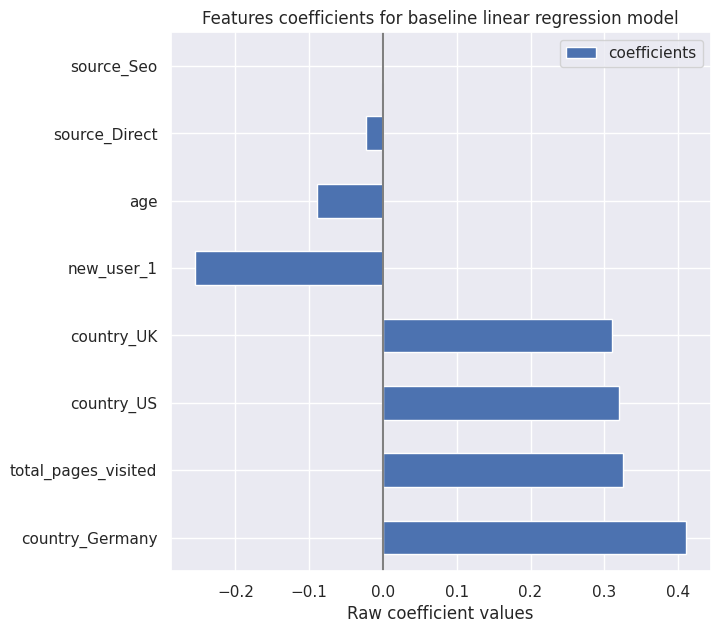

In [410]:
coef_sorted = df_coefs.reindex(df_coefs['coefficients'].abs().sort_values(ascending=False).index)
coef_sorted.plot.barh(figsize=(9, 7))
plt.title("Features coefficients for baseline linear regression model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

This plot shows us that :    


*   Source (the way users accessed the website) is quite irrelevant in determining conversion.

*   Age is actually not as important as we might have been led to believe based on our EDA visualizations. Nevertheless, we have seen from the variable distribution that the newsletter audience is quite young, with a median at 30 years old. It might be wise to cater communication to this age group to obtain a better conversion rate.
*   Being a new user is quite strongly negatively correlated to conversion : this suggest that users tend to not register on their first on the website, and that in order to increase conversion rate, it would be good to find ways to incentivize older users to come back.


*   The user's country has a strong importance, and in particular, a user from Germany is more likely to subscribe than a user from the US or the UK. It may be wise to make the website available in German to encourage German visitors to enroll. One thing to remember is that because of one hot encoding, China is not featured here, but judgin from earlier visualization, we suspect being from China is probably negatively correlated to conversion rate. China has one of the largest population in the world, so understanding and adapting what repels them what might yield a substantial amount of new subscribers.

*   The total number of visited pages is the second most important feature, so changing the website layout to encourage users to visit several pages might help improve the conversion rate.





In [414]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip3 freeze > requirements.txt